In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Data Processing and ML Libraries
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
# Regression Models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import xgboost as xgb
from xgboost import XGBRegressor

In [ ]:
# Saving Model
import joblib

In [ ]:
california_housing = fetch_california_housing()

In [ ]:
california_housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [ ]:
X = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
y = pd.DataFrame(california_housing.target, columns=['target'])
df = pd.concat([X, y], axis=1)


In [ ]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
print("Dataset Information:")
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [ ]:
print("\nDescriptive Statistics:")
df.describe()


Descriptive Statistics:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


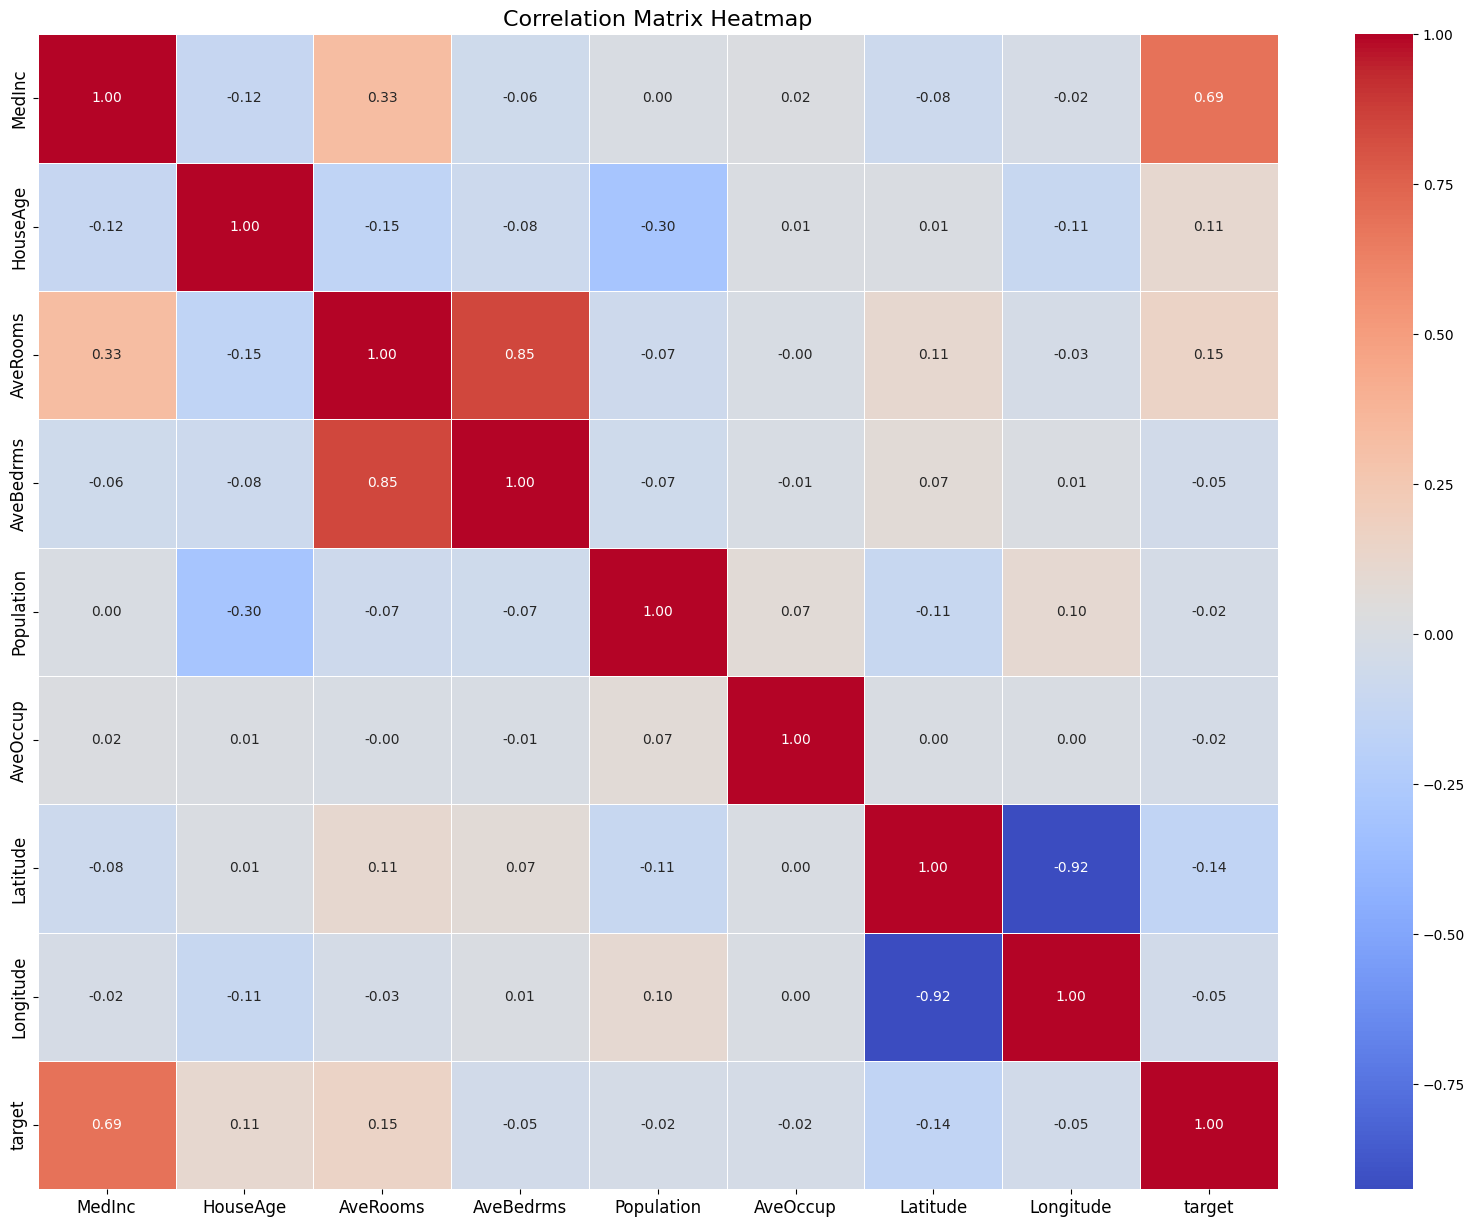

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(20, 15))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


In [ ]:
print('Check Missing Values: ')
df.isna().sum()

Check Missing Values: 


,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
target,0


In [ ]:
print('Check Duplicates: ')
df.duplicated().sum()

Check Duplicates: 


np.int64(0)

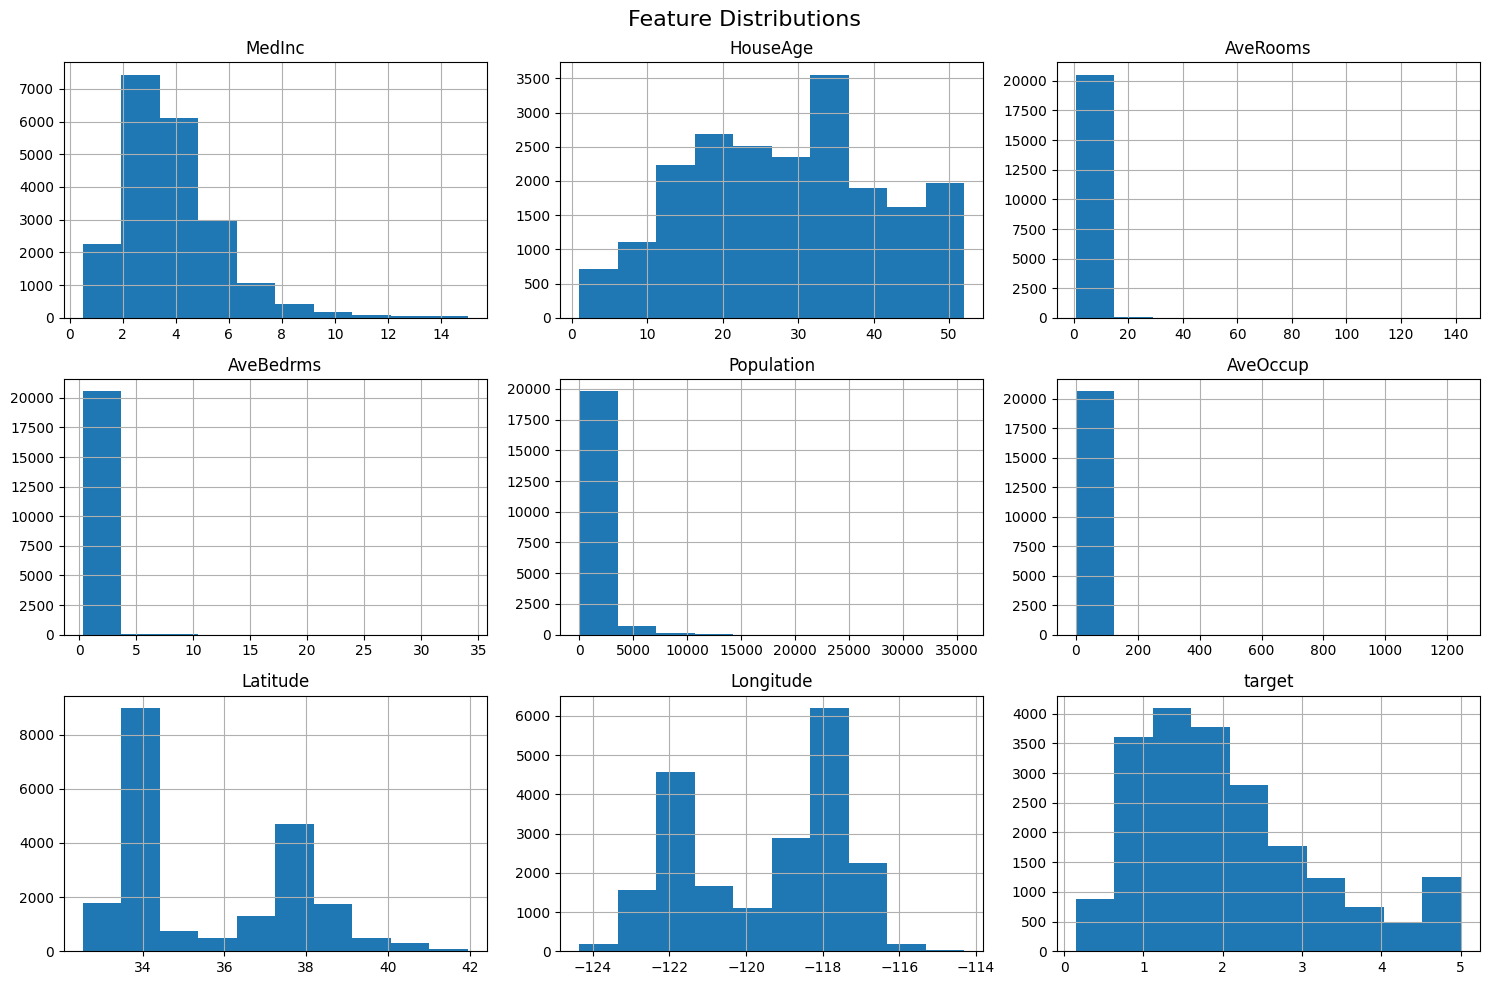

In [ ]:
df.hist(figsize=(15, 10))
plt.suptitle('Feature Distributions', fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import joblib


def train_and_evaluate_models(X_train, X_test, y_train, y_test):
    # Define models with their parameter grids for hyperparameter tuning
    models = {
        'Linear Regression': {
            'model': LinearRegression(),
            'params': {}  # Linear Regression doesn't have many hyperparameters
        },
        'Decision Tree': {
            'model': DecisionTreeRegressor(random_state=42),
            'params': {
                'max_depth': [3, 5, 7, 10],
                'min_samples_split': [2, 5, 10]
            }
        },
        'Random Forest': {
            'model': RandomForestRegressor(random_state=42),
            'params': {
                'n_estimators': [50, 100],
                'max_depth': [5, 10],
                'min_samples_split': [2, 5, 7]
            }
        },
        'XGBoost': {
            'model': XGBRegressor(random_state=42),
            'params': {
                'n_estimators': [50, 100],
                'learning_rate': [0.01, 0.1, 0.3],
                'max_depth': [3, 5, 7]
            }
        }
    }

    # Results storage
    results = {}

    # Train and evaluate each model
    for name, model_info in models.items():
        # Perform GridSearchCV if hyperparameters are provided
        if model_info['params']:
            grid_search = GridSearchCV(
                model_info['model'],
                model_info['params'],
                cv=5,
                scoring='neg_mean_squared_error'
            )
            grid_search.fit(X_train, y_train.values.ravel())
            best_model = grid_search.best_estimator_
            best_params = grid_search.best_params_
        else:
            best_model = model_info['model']
            best_model.fit(X_train, y_train.values.ravel())
            best_params = {}

        # Predictions
        y_pred = best_model.predict(X_test)

        # Evaluation metrics
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        # Store results
        results[name] = {
            'RMSE': rmse,
            'MAE': mae,
            'R2': r2,
            'Best Params': best_params,
            'Model': best_model
        }

        print(f"\n{name} Results:")
        print(f"RMSE: {rmse:.4f}")
        print(f"MAE: {mae:.4f}")
        print(f"R2 Score: {r2:.4f}")
        print("Best Parameters:", best_params)

    return results


In [ ]:
# Train and evaluate models
results = train_and_evaluate_models(X_train, X_test, y_train, y_test)


Linear Regression Results:
RMSE: 0.7456
MAE: 0.5332
R2 Score: 0.5758
Best Parameters: {}

Decision Tree Results:
RMSE: 0.6454
MAE: 0.4340
R2 Score: 0.6822
Best Parameters: {'max_depth': 10, 'min_samples_split': 10}

Random Forest Results:
RMSE: 0.5444
MAE: 0.3666
R2 Score: 0.7738
Best Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}

XGBoost Results:
RMSE: 0.4689
MAE: 0.3073
R2 Score: 0.8322
Best Parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}


In [ ]:
def save_best_model(results):
    # Find the best model based on lowest RMSE
    best_model_name = min(results, key=lambda x: results[x]['RMSE'])
    best_model = results[best_model_name]['Model']

    # Save the model
    joblib.dump(best_model, 'best_house_price_model.joblib')
    print(f"\nBest model ({best_model_name}) saved as 'best_house_price_model.joblib'")

In [ ]:
# Save the best model
save_best_model(results)


Best model (XGBoost) saved as 'best_house_price_model.joblib'


#House Price Prediction Report

##Approach & Decisions

Data Preparation: We used the California housing dataset and performed exploratory data analysis (EDA) using correlation matrices and distribution plots.

Preprocessing: Missing values were checked, and features were standardized using StandardScaler for better model performance.

Model Selection: Four regression models were tested—Linear Regression, Decision Tree, Random Forest, and XGBoost.

Hyperparameter Tuning: GridSearchCV was applied to Decision Tree, Random Forest, and XGBoost to find the best parameters.

Evaluation Metrics: Models were evaluated using RMSE, MAE, and R² scores.

##Model Performance

Linear Regression: Baseline model with RMSE of 0.7456 and R² of 0.5758.

Decision Tree: Improved performance (RMSE: 0.6454, R²: 0.6822) after tuning.

Random Forest: Performed better with RMSE 0.5444 and R² 0.7738.

XGBoost: Best model with RMSE 0.4689 and R² 0.8322.

##Conclusion

XGBoost outperformed other models and was saved as the final model. This approach effectively handled housing price prediction using regression techniques and hyperparameter tuning.